In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
events = pd.read_csv(r"C:\Users\NadimintiDeepthi\Desktop\ml\2024-04-12 10_30am.csv")

In [3]:
events

,USER_ID,USER_FULLNAME,USER_USERNAME,USER_PHONENUMBER,USER_EMAIL,USER_DEPARTMENT,USER_ROLE,USER_SKILL,USER_EXPERIENCE,USER_STRENGTH,EVENT_ID,EVENT_TITLE,EVENT_DOMAIN,EVENT_DATE,EVENT_DURATION,EVENT_TRAINER,EVENT_LOCATION,EVENT_DESCRIPTION,EVENT_CAPACITY,EVENT_CURRENTCAPACITY
0,66166583fc13ae7017ab925b,Garreth,geulnm,205-959-8525,gconnerlynm@loc.gov,IT,user,MongoDB,5,2,66167c20e10537e8c57ab3e8,Frontend Frameworks Masterclass,Fullstack,23-04-2024,3,Arv,tardis,Frontend Frameworks Masterclass focuses on mod...,69,39
1,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,66167c20e10537e7c2855baa,Software Testing Techniques Workshop,Fullstack,25-04-2024,1,Neddy,jarvis,Software Testing Techniques Workshop covers so...,50,22
2,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,66167c20e10537e7a3c972f6,Blockchain Development Fundamentals Bootcamp,Blockchain,21-04-2024,1,Neel,groot,Blockchain Development Fundamentals Bootcamp p...,59,30
3,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,66167c20e10537e8a3bcf189,IoT Solutions Workshop,IoT,27-04-2024,5,Barbara,groot,IoT Solutions Workshop explores Internet of Th...,61,33
4,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,66167c20e10537e8928bbf86,Cybersecurity Basics Seminar,Cybersecurity,19-04-2024,5,Aldis,aurum,Cybersecurity Basics Seminar provides foundati...,61,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,66166582fc13ae7017ab9096,Orazio,ogaishsonb1,951-293-3248,omartlandb1@com.com,IT,user,Agile,45,3,66167c20e10537e83e6ca509,DevOps Essentials Workshop,Data,22-04-2024,1,Marlee,jarvis,DevOps Essentials Workshop covers practices fo...,55,34
1001,66166582fc13ae7017ab909b,Bianka,bpennellb6,202-310-1010,bsirkettb6@engadget.com,finance,user,PHP,1,5,66167c20e10537e7714b2053,IoT Security Best Practices Training,IoT,21-04-2024,3,Aaren,groot,IoT Security Best Practices Training focuses o...,54,40
1002,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,66167c20e10537e6dda6cc34,Database Design and Optimization Workshop,Database,20-04-2024,2,Hollis,falcon,Database Design and Optimization Workshop cove...,60,37
1003,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,66167c20e10537e83cb67476,Machine Learning Fundamentals Training,Data,21-04-2024,4,Kit,aurum,Machine Learning Fundamentals Training introdu...,57,39


In [4]:
num_duplicate_rows = events.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 22


In [5]:
events.drop_duplicates(inplace=True)

# Optionally, print the cleaned DataFrame
print(events)

                       USER_ID USER_FULLNAME USER_USERNAME USER_PHONENUMBER  \
0     66166583fc13ae7017ab925b       Garreth        geulnm     205-959-8525   
1     66166582fc13ae7017ab916a         Cammy     cbrahmsgx     900-957-4407   
2     66166582fc13ae7017ab916a         Cammy     cbrahmsgx     900-957-4407   
3     66166582fc13ae7017ab916a         Cammy     cbrahmsgx     900-957-4407   
4     66166582fc13ae7017ab916a         Cammy     cbrahmsgx     900-957-4407   
...                        ...           ...           ...              ...   
1000  66166582fc13ae7017ab9096        Orazio   ogaishsonb1     951-293-3248   
1001  66166582fc13ae7017ab909b        Bianka    bpennellb6     202-310-1010   
1002  66166581fc13ae7017ab8f11     Bridgette     bwherrit8     174-870-6523   
1003  66166581fc13ae7017ab8f11     Bridgette     bwherrit8     174-870-6523   
1004  66166581fc13ae7017ab8f11     Bridgette     bwherrit8     174-870-6523   

                   USER_EMAIL USER_DEPARTMENT USER_

In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 1004
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   USER_ID                983 non-null    object
 1   USER_FULLNAME          983 non-null    object
 2   USER_USERNAME          983 non-null    object
 3   USER_PHONENUMBER       983 non-null    object
 4   USER_EMAIL             983 non-null    object
 5   USER_DEPARTMENT        983 non-null    object
 6   USER_ROLE              983 non-null    object
 7   USER_SKILL             983 non-null    object
 8   USER_EXPERIENCE        983 non-null    int64 
 9   USER_STRENGTH          983 non-null    int64 
 10  EVENT_ID               983 non-null    object
 11  EVENT_TITLE            983 non-null    object
 12  EVENT_DOMAIN           983 non-null    object
 13  EVENT_DATE             983 non-null    object
 14  EVENT_DURATION         983 non-null    int64 
 15  EVENT_TRAINER          983 

In [7]:
null_counts = events.isnull().sum()

print(null_counts)

USER_ID                  0
USER_FULLNAME            0
USER_USERNAME            0
USER_PHONENUMBER         0
USER_EMAIL               0
USER_DEPARTMENT          0
USER_ROLE                0
USER_SKILL               0
USER_EXPERIENCE          0
USER_STRENGTH            0
EVENT_ID                 0
EVENT_TITLE              0
EVENT_DOMAIN             0
EVENT_DATE               0
EVENT_DURATION           0
EVENT_TRAINER            0
EVENT_LOCATION           0
EVENT_DESCRIPTION        0
EVENT_CAPACITY           0
EVENT_CURRENTCAPACITY    0
dtype: int64


In [8]:
events.describe()

,USER_EXPERIENCE,USER_STRENGTH,EVENT_DURATION,EVENT_CAPACITY,EVENT_CURRENTCAPACITY
count,983.000000,983.000000,983.000000,983.000000,983.000000
mean,23.328586,2.902340,2.787386,59.123093,31.268566
std,12.550301,1.382398,1.452774,5.457306,6.985663
min,1.000000,1.000000,1.000000,50.000000,20.000000
25%,13.000000,2.000000,1.000000,56.000000,23.000000
50%,23.000000,3.000000,3.000000,57.000000,33.000000
75%,34.000000,4.000000,4.000000,64.000000,38.000000
max,45.000000,5.000000,5.000000,70.000000,40.000000


***UNIVARIATE ANALYSIS***

Count of Skills:
USER_SKILL
Ruby           67
SQL            64
Git            61
C++            60
MongoDB        55
React          55
Java           55
Agile          52
CSS            49
Node.js        49
Firebase       48
Python         48
Swift          47
Objective-C    45
HTML           45
Kubernetes     41
PHP            41
Angular        37
Docker         33
JavaScript     31
Name: count, dtype: int64



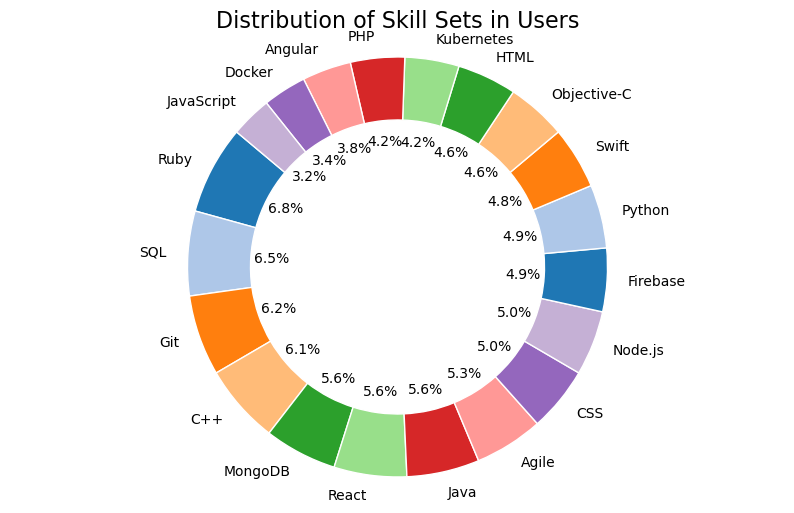

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each skill set
count_skills = events['USER_SKILL'].value_counts()
print("Count of Skills:")
print(count_skills)
print()

# Visualize the Data
plt.figure(figsize=(10, 6))

colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5']

# Create the pie chart
plt.pie(count_skills, 
        labels=count_skills.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        wedgeprops=dict(width=0.3, edgecolor='w'))

# Add title and equal axis for a circular pie
plt.title('Distribution of Skill Sets in Users', fontsize=16)
plt.axis('equal')

# Show the plot
plt.show()


count    983.000000
mean      23.328586
std       12.550301
min        1.000000
25%       13.000000
50%       23.000000
75%       34.000000
max       45.000000
Name: USER_EXPERIENCE, dtype: float64


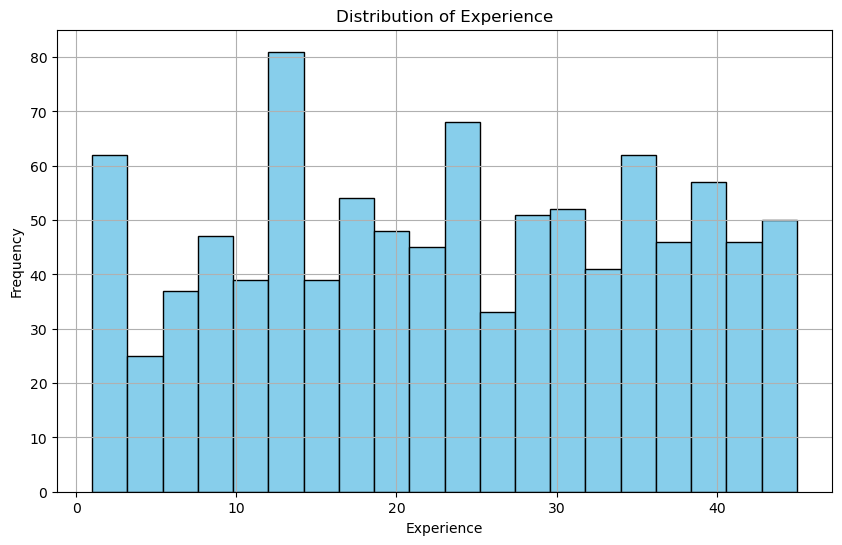

In [10]:
# Descriptive statistics
print(events['USER_EXPERIENCE'].describe())

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(events['USER_EXPERIENCE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

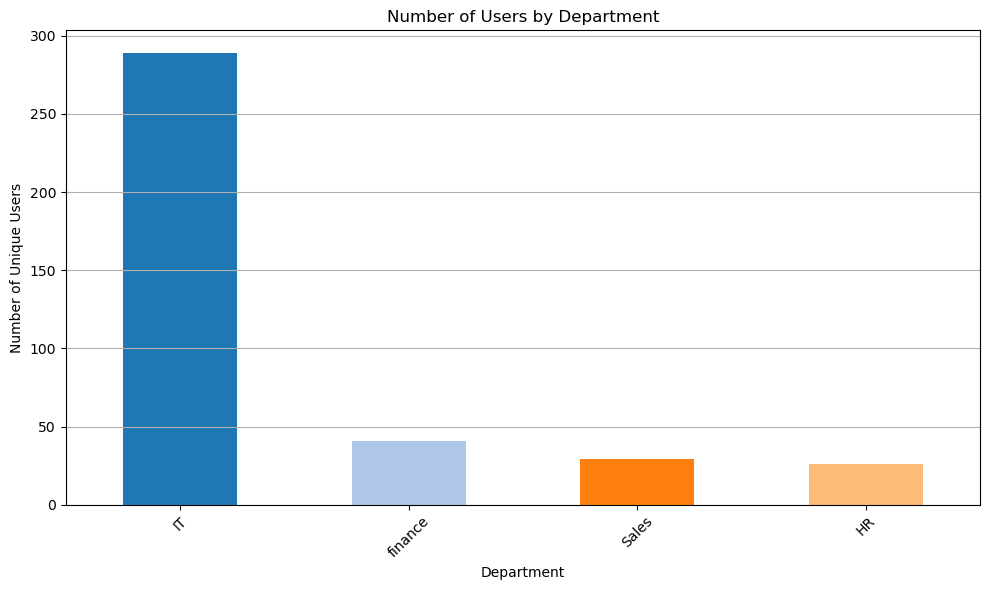

In [11]:
# Group by user ID and get the first designation for each user
dept_per_user = events.groupby('USER_ID')['USER_DEPARTMENT'].first()

# Count the number of unique users with each designation
users_by_dept = dept_per_user.value_counts()
print()
# Plot the distribution of designations
plt.figure(figsize=(10, 6))
users_by_dept.plot(kind='bar', color=colors)
plt.title('Number of Users by Department')
plt.xlabel('Department')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

Count of Domain:
EVENT_DOMAIN
Fullstack        268
Data             228
Cloud            122
Agile             71
Cybersecurity     68
Blockchain        66
IoT               66
Database          55
Network           39
Name: count, dtype: int64



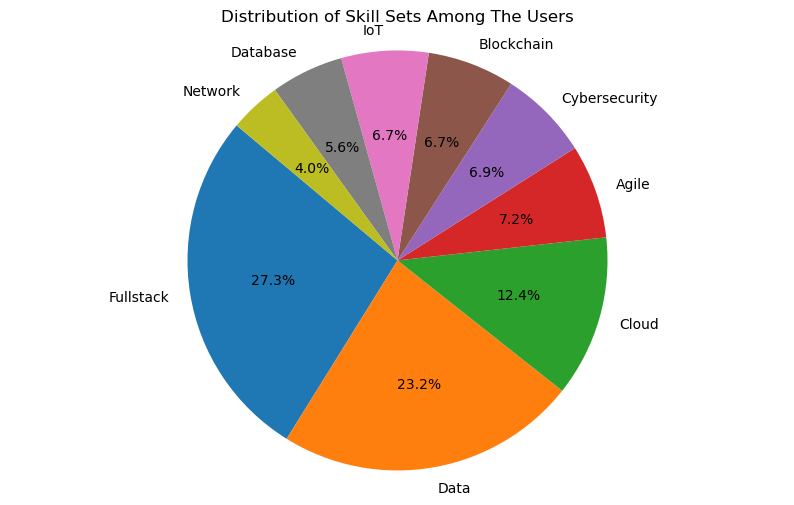

In [12]:
count_domain = events['EVENT_DOMAIN'].value_counts()
print("Count of Domain:")
print(count_domain)
print()

plt.figure(figsize=(10, 6))
plt.pie(count_domain, labels=count_domain.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Skill Sets Among The Users')
plt.axis('equal') 
plt.show()

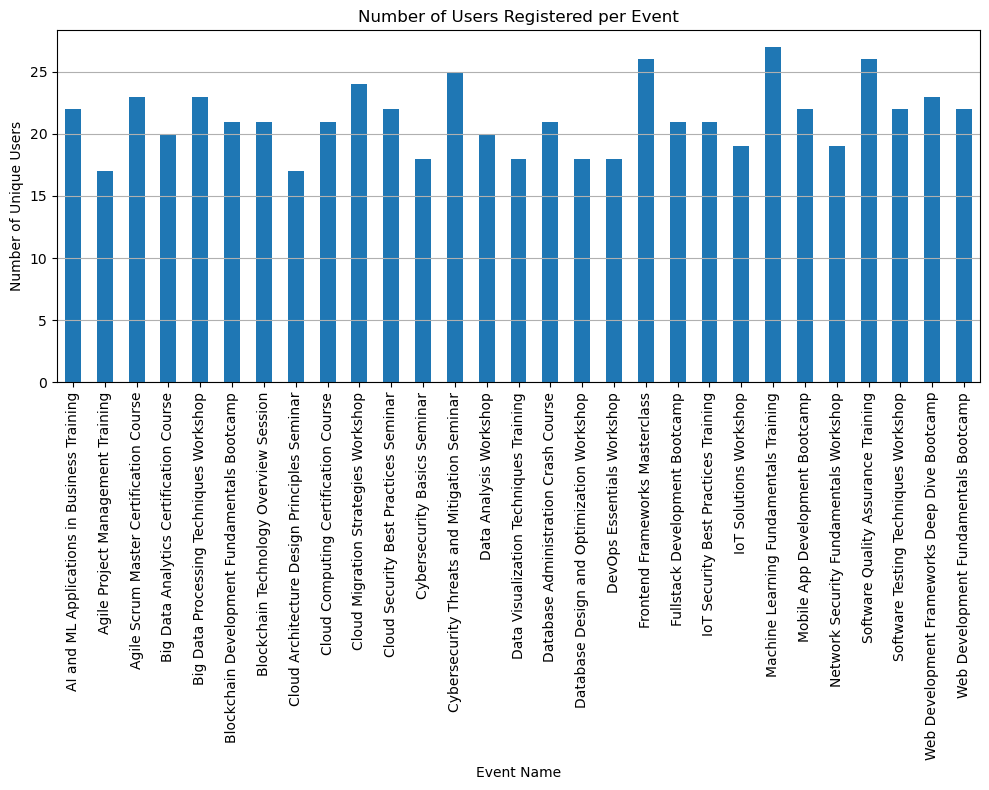

In [13]:
unique_users_per_event = events.groupby('EVENT_TITLE')['USER_ID'].nunique()

# Create a bar plot
plt.figure(figsize=(10, 8))
unique_users_per_event.plot(kind='bar')
plt.title('Number of Users Registered per Event')
plt.xlabel('Event Name')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for better visualization

# Show plot
plt.tight_layout()
plt.show()

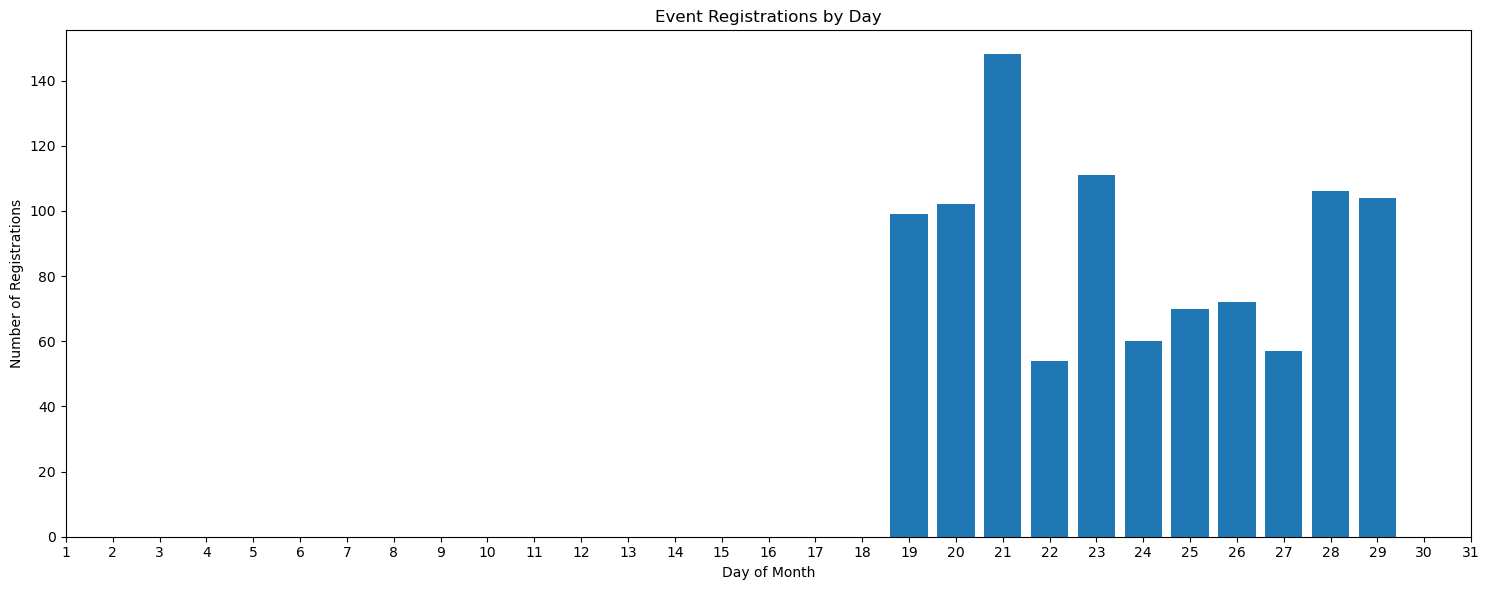

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'events' DataFrame has a column 'EVENT_DATE' containing dates in '%d-%m-%Y' format
events['DATE'] = pd.to_datetime(events['EVENT_DATE'], format='%d-%m-%Y')

# Extract the day from the 'Date' column
events['Day'] = events['DATE'].dt.day

# Group registrations by day and count
daily_registrations = events.groupby('Day')['USER_ID'].count()

# Create a bar plot
plt.figure(figsize=(15, 6))  # Adjusted figsize for better visualization
plt.bar(daily_registrations.index, daily_registrations.values)
plt.xlabel('Day of Month')
plt.ylabel('Number of Registrations')
plt.title('Event Registrations by Day')
plt.xticks(range(1, 32))  # Adjust xticks to show all days of the month

# Show the plot
plt.tight_layout()
plt.show()


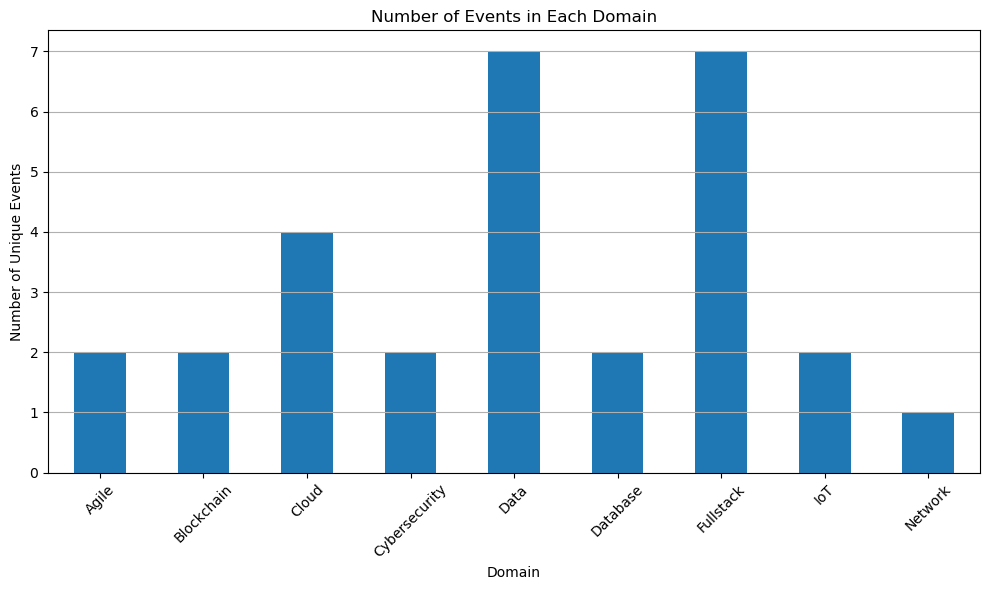

In [15]:
unique_events_per_domain = events.groupby('EVENT_DOMAIN')['EVENT_ID'].nunique()

# Create a bar plot
plt.figure(figsize=(10, 6))
unique_events_per_domain.plot(kind='bar')
plt.title('Number of Events in Each Domain')
plt.xlabel('Domain')
plt.ylabel('Number of Unique Events')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for better visualization

# Show plot

plt.tight_layout()
plt.show()

***BIVARIATE ANALYSIS***

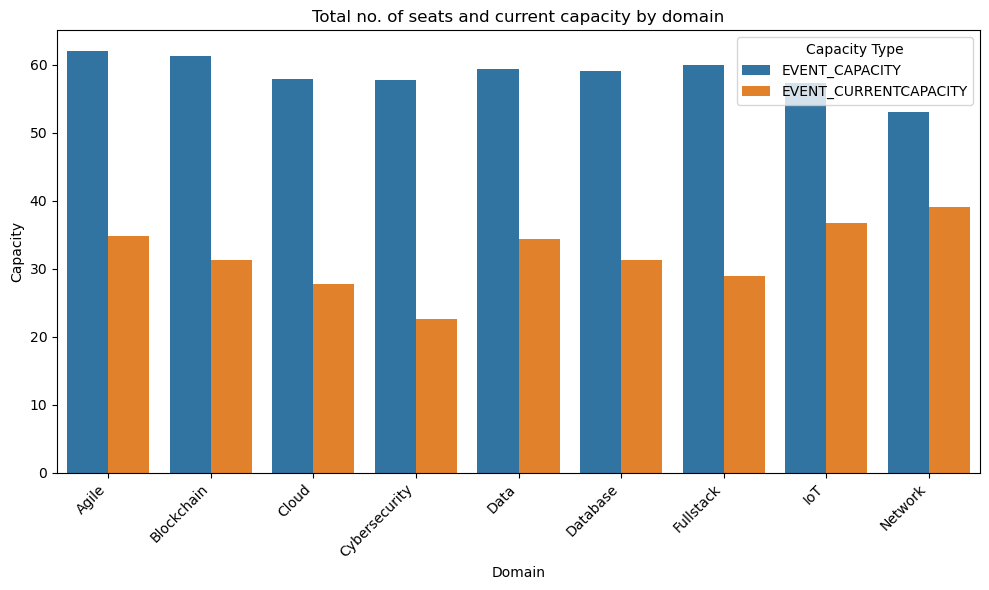

In [16]:
events_pivot = events.groupby('EVENT_DOMAIN').agg({'EVENT_CAPACITY': 'mean', 'EVENT_CURRENTCAPACITY': 'mean'}).reset_index()

events_melted = pd.melt(events_pivot, id_vars=['EVENT_DOMAIN'], value_vars=['EVENT_CAPACITY', 'EVENT_CURRENTCAPACITY'], 
                        var_name='Capacity Type', value_name='Capacity')

plt.figure(figsize=(10, 6))

sns.barplot(data=events_melted, x='EVENT_DOMAIN', y='Capacity', hue='Capacity Type', estimator=np.mean)

plt.title('Total no. of seats and current capacity by domain')
plt.xlabel('Domain')
plt.ylabel('Capacity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Capacity Type', loc='upper right')
plt.tight_layout()
plt.show()


C:\Users\NadimintiDeepthi\AppData\Local\Temp\ipykernel_10584\3459238620.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  skillset_experience_groups = events.groupby(['USER_SKILL', 'EXPERIENCE_GROUP']).size().unstack(fill_value=0)


<Figure size 5000x1500 with 0 Axes>

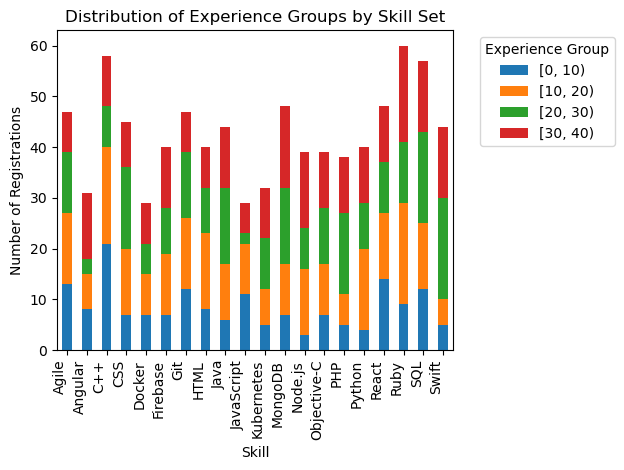

In [17]:
age_groups = np.arange(0, events['USER_EXPERIENCE'].max() + 1, 10)

# Categorize 'EXPERIENCE' into age groups
events['EXPERIENCE_GROUP'] = pd.cut(events['USER_EXPERIENCE'], bins=age_groups, right=False)

# Grouping the DataFrame by 'USER_SKILL' and 'EXPERIENCE_GROUP' and counting the occurrences
skillset_experience_groups = events.groupby(['USER_SKILL', 'EXPERIENCE_GROUP']).size().unstack(fill_value=0)

# Creating the bar plot
plt.figure(figsize=(50, 15))
skillset_experience_groups.plot(kind='bar', stacked=True)
plt.title('Distribution of Experience Groups by Skill Set')
plt.xlabel('Skill')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Experience Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**FEATURE ENGINEERING**

***FEATURE CREATION***

In [18]:
# Compute filled capacity ratio
events['FILLED_CAPACITY_RATIO'] = events['EVENT_CURRENTCAPACITY'] / events['EVENT_CAPACITY']

# Ensure the ratio is between 0 and 1
events['FILLED_CAPACITY_RATIO'] = events['FILLED_CAPACITY_RATIO'].clip(lower=0, upper=1)


***FEATURE SELECTION***

In [19]:
bins = [0, 10, 20, 30, 40, float('inf')]
labels = [0, 1, 2, 3, 4]

events['EXPERIENCE_GROUP'] = pd.cut(events['USER_EXPERIENCE'], bins=bins, labels=labels, right=False)

In [20]:
events

,USER_ID,USER_FULLNAME,USER_USERNAME,USER_PHONENUMBER,USER_EMAIL,USER_DEPARTMENT,USER_ROLE,USER_SKILL,USER_EXPERIENCE,USER_STRENGTH,...,EVENT_DURATION,EVENT_TRAINER,EVENT_LOCATION,EVENT_DESCRIPTION,EVENT_CAPACITY,EVENT_CURRENTCAPACITY,DATE,Day,EXPERIENCE_GROUP,FILLED_CAPACITY_RATIO
0,66166583fc13ae7017ab925b,Garreth,geulnm,205-959-8525,gconnerlynm@loc.gov,IT,user,MongoDB,5,2,...,3,Arv,tardis,Frontend Frameworks Masterclass focuses on mod...,69,39,2024-04-23,23,0,0.565217
1,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,1,Neddy,jarvis,Software Testing Techniques Workshop covers so...,50,22,2024-04-25,25,4,0.440000
2,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,1,Neel,groot,Blockchain Development Fundamentals Bootcamp p...,59,30,2024-04-21,21,4,0.508475
3,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,5,Barbara,groot,IoT Solutions Workshop explores Internet of Th...,61,33,2024-04-27,27,4,0.540984
4,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,5,Aldis,aurum,Cybersecurity Basics Seminar provides foundati...,61,22,2024-04-19,19,4,0.360656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,66166582fc13ae7017ab9096,Orazio,ogaishsonb1,951-293-3248,omartlandb1@com.com,IT,user,Agile,45,3,...,1,Marlee,jarvis,DevOps Essentials Workshop covers practices fo...,55,34,2024-04-22,22,4,0.618182
1001,66166582fc13ae7017ab909b,Bianka,bpennellb6,202-310-1010,bsirkettb6@engadget.com,finance,user,PHP,1,5,...,3,Aaren,groot,IoT Security Best Practices Training focuses o...,54,40,2024-04-21,21,0,0.740741
1002,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,...,2,Hollis,falcon,Database Design and Optimization Workshop cove...,60,37,2024-04-20,20,2,0.616667
1003,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,...,4,Kit,aurum,Machine Learning Fundamentals Training introdu...,57,39,2024-04-21,21,2,0.684211


In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# events['NEW_EVENT_TITLE'] = label_encoder.fit_transform(events['EVENT_TITLE'].astype(str))
events['NEW_USER_SKILL'] = label_encoder.fit_transform(events['USER_SKILL'].astype(str))

In [22]:
events

,USER_ID,USER_FULLNAME,USER_USERNAME,USER_PHONENUMBER,USER_EMAIL,USER_DEPARTMENT,USER_ROLE,USER_SKILL,USER_EXPERIENCE,USER_STRENGTH,...,EVENT_TRAINER,EVENT_LOCATION,EVENT_DESCRIPTION,EVENT_CAPACITY,EVENT_CURRENTCAPACITY,DATE,Day,EXPERIENCE_GROUP,FILLED_CAPACITY_RATIO,NEW_USER_SKILL
0,66166583fc13ae7017ab925b,Garreth,geulnm,205-959-8525,gconnerlynm@loc.gov,IT,user,MongoDB,5,2,...,Arv,tardis,Frontend Frameworks Masterclass focuses on mod...,69,39,2024-04-23,23,0,0.565217,11
1,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,Neddy,jarvis,Software Testing Techniques Workshop covers so...,50,22,2024-04-25,25,4,0.440000,7
2,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,Neel,groot,Blockchain Development Fundamentals Bootcamp p...,59,30,2024-04-21,21,4,0.508475,7
3,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,Barbara,groot,IoT Solutions Workshop explores Internet of Th...,61,33,2024-04-27,27,4,0.540984,7
4,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,Aldis,aurum,Cybersecurity Basics Seminar provides foundati...,61,22,2024-04-19,19,4,0.360656,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,66166582fc13ae7017ab9096,Orazio,ogaishsonb1,951-293-3248,omartlandb1@com.com,IT,user,Agile,45,3,...,Marlee,jarvis,DevOps Essentials Workshop covers practices fo...,55,34,2024-04-22,22,4,0.618182,0
1001,66166582fc13ae7017ab909b,Bianka,bpennellb6,202-310-1010,bsirkettb6@engadget.com,finance,user,PHP,1,5,...,Aaren,groot,IoT Security Best Practices Training focuses o...,54,40,2024-04-21,21,0,0.740741,14
1002,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,...,Hollis,falcon,Database Design and Optimization Workshop cove...,60,37,2024-04-20,20,2,0.616667,15
1003,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,...,Kit,aurum,Machine Learning Fundamentals Training introdu...,57,39,2024-04-21,21,2,0.684211,15


In [23]:
events['NEW_EVENT_DOMAIN'] = label_encoder.fit_transform(events['EVENT_DOMAIN'].astype(str))
events['NEW_EVENT_DATE'] = label_encoder.fit_transform(events['EVENT_DATE'].astype(str))
events['NEW_EVENT_DURATION'] = label_encoder.fit_transform(events['EVENT_DURATION'].astype(str))

In [24]:
events

,USER_ID,USER_FULLNAME,USER_USERNAME,USER_PHONENUMBER,USER_EMAIL,USER_DEPARTMENT,USER_ROLE,USER_SKILL,USER_EXPERIENCE,USER_STRENGTH,...,EVENT_CAPACITY,EVENT_CURRENTCAPACITY,DATE,Day,EXPERIENCE_GROUP,FILLED_CAPACITY_RATIO,NEW_USER_SKILL,NEW_EVENT_DOMAIN,NEW_EVENT_DATE,NEW_EVENT_DURATION
0,66166583fc13ae7017ab925b,Garreth,geulnm,205-959-8525,gconnerlynm@loc.gov,IT,user,MongoDB,5,2,...,69,39,2024-04-23,23,0,0.565217,11,6,4,2
1,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,50,22,2024-04-25,25,4,0.440000,7,6,6,0
2,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,59,30,2024-04-21,21,4,0.508475,7,1,2,0
3,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,61,33,2024-04-27,27,4,0.540984,7,7,8,4
4,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,61,22,2024-04-19,19,4,0.360656,7,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,66166582fc13ae7017ab9096,Orazio,ogaishsonb1,951-293-3248,omartlandb1@com.com,IT,user,Agile,45,3,...,55,34,2024-04-22,22,4,0.618182,0,4,3,0
1001,66166582fc13ae7017ab909b,Bianka,bpennellb6,202-310-1010,bsirkettb6@engadget.com,finance,user,PHP,1,5,...,54,40,2024-04-21,21,0,0.740741,14,7,2,2
1002,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,...,60,37,2024-04-20,20,2,0.616667,15,5,1,1
1003,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,...,57,39,2024-04-21,21,2,0.684211,15,4,2,3


In [25]:
column_names = events.columns.tolist()

# Print all column names
print(column_names)

['USER_ID', 'USER_FULLNAME', 'USER_USERNAME', 'USER_PHONENUMBER', 'USER_EMAIL', 'USER_DEPARTMENT', 'USER_ROLE', 'USER_SKILL', 'USER_EXPERIENCE', 'USER_STRENGTH', 'EVENT_ID', 'EVENT_TITLE', 'EVENT_DOMAIN', 'EVENT_DATE', 'EVENT_DURATION', 'EVENT_TRAINER', 'EVENT_LOCATION', 'EVENT_DESCRIPTION', 'EVENT_CAPACITY', 'EVENT_CURRENTCAPACITY', 'DATE', 'Day', 'EXPERIENCE_GROUP', 'FILLED_CAPACITY_RATIO', 'NEW_USER_SKILL', 'NEW_EVENT_DOMAIN', 'NEW_EVENT_DATE', 'NEW_EVENT_DURATION']


In [26]:
columns_to_drop = [
    'USER_ID',
    'USER_FULLNAME',
    'USER_USERNAME',
    'USER_PHONENUMBER',
    'USER_EMAIL',
    'USER_ROLE',
    'EVENT_ID',
    'EVENT_LOCATION',
    'EVENT_DESCRIPTION',
    'EVENT_CAPACITY',
    'EVENT_CURRENTCAPACITY',
    'DATE',
    'Day'
]

events.drop(columns=columns_to_drop, inplace=True)


In [27]:
events

,USER_DEPARTMENT,USER_SKILL,USER_EXPERIENCE,USER_STRENGTH,EVENT_TITLE,EVENT_DOMAIN,EVENT_DATE,EVENT_DURATION,EVENT_TRAINER,EXPERIENCE_GROUP,FILLED_CAPACITY_RATIO,NEW_USER_SKILL,NEW_EVENT_DOMAIN,NEW_EVENT_DATE,NEW_EVENT_DURATION
0,IT,MongoDB,5,2,Frontend Frameworks Masterclass,Fullstack,23-04-2024,3,Arv,0,0.565217,11,6,4,2
1,HR,HTML,40,2,Software Testing Techniques Workshop,Fullstack,25-04-2024,1,Neddy,4,0.440000,7,6,6,0
2,HR,HTML,40,2,Blockchain Development Fundamentals Bootcamp,Blockchain,21-04-2024,1,Neel,4,0.508475,7,1,2,0
3,HR,HTML,40,2,IoT Solutions Workshop,IoT,27-04-2024,5,Barbara,4,0.540984,7,7,8,4
4,HR,HTML,40,2,Cybersecurity Basics Seminar,Cybersecurity,19-04-2024,5,Aldis,4,0.360656,7,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,IT,Agile,45,3,DevOps Essentials Workshop,Data,22-04-2024,1,Marlee,4,0.618182,0,4,3,0
1001,finance,PHP,1,5,IoT Security Best Practices Training,IoT,21-04-2024,3,Aaren,0,0.740741,14,7,2,2
1002,Sales,Python,23,2,Database Design and Optimization Workshop,Database,20-04-2024,2,Hollis,2,0.616667,15,5,1,1
1003,Sales,Python,23,2,Machine Learning Fundamentals Training,Data,21-04-2024,4,Kit,2,0.684211,15,4,2,3


In [28]:
events['NEW_USER_DEPARTMENT'] = label_encoder.fit_transform(events['USER_DEPARTMENT'].astype(str))

In [29]:
events


,USER_DEPARTMENT,USER_SKILL,USER_EXPERIENCE,USER_STRENGTH,EVENT_TITLE,EVENT_DOMAIN,EVENT_DATE,EVENT_DURATION,EVENT_TRAINER,EXPERIENCE_GROUP,FILLED_CAPACITY_RATIO,NEW_USER_SKILL,NEW_EVENT_DOMAIN,NEW_EVENT_DATE,NEW_EVENT_DURATION,NEW_USER_DEPARTMENT
0,IT,MongoDB,5,2,Frontend Frameworks Masterclass,Fullstack,23-04-2024,3,Arv,0,0.565217,11,6,4,2,1
1,HR,HTML,40,2,Software Testing Techniques Workshop,Fullstack,25-04-2024,1,Neddy,4,0.440000,7,6,6,0,0
2,HR,HTML,40,2,Blockchain Development Fundamentals Bootcamp,Blockchain,21-04-2024,1,Neel,4,0.508475,7,1,2,0,0
3,HR,HTML,40,2,IoT Solutions Workshop,IoT,27-04-2024,5,Barbara,4,0.540984,7,7,8,4,0
4,HR,HTML,40,2,Cybersecurity Basics Seminar,Cybersecurity,19-04-2024,5,Aldis,4,0.360656,7,3,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,IT,Agile,45,3,DevOps Essentials Workshop,Data,22-04-2024,1,Marlee,4,0.618182,0,4,3,0,1
1001,finance,PHP,1,5,IoT Security Best Practices Training,IoT,21-04-2024,3,Aaren,0,0.740741,14,7,2,2,3
1002,Sales,Python,23,2,Database Design and Optimization Workshop,Database,20-04-2024,2,Hollis,2,0.616667,15,5,1,1,2
1003,Sales,Python,23,2,Machine Learning Fundamentals Training,Data,21-04-2024,4,Kit,2,0.684211,15,4,2,3,2


In [30]:
column_names = events.columns.tolist()

# Print all column names
print(column_names)

['USER_DEPARTMENT', 'USER_SKILL', 'USER_EXPERIENCE', 'USER_STRENGTH', 'EVENT_TITLE', 'EVENT_DOMAIN', 'EVENT_DATE', 'EVENT_DURATION', 'EVENT_TRAINER', 'EXPERIENCE_GROUP', 'FILLED_CAPACITY_RATIO', 'NEW_USER_SKILL', 'NEW_EVENT_DOMAIN', 'NEW_EVENT_DATE', 'NEW_EVENT_DURATION', 'NEW_USER_DEPARTMENT']


In [31]:
remaining_columns = [
    'USER_DEPARTMENT',
    'USER_SKILL',
    'USER_EXPERIENCE',
    # 'EVENT_TITLE',
    'EVENT_DOMAIN',
    'EVENT_DATE',
    'EVENT_DURATION',
    'EVENT_TRAINER'
]


events.drop(columns=remaining_columns, inplace=True)

In [32]:
events

,USER_STRENGTH,EVENT_TITLE,EXPERIENCE_GROUP,FILLED_CAPACITY_RATIO,NEW_USER_SKILL,NEW_EVENT_DOMAIN,NEW_EVENT_DATE,NEW_EVENT_DURATION,NEW_USER_DEPARTMENT
0,2,Frontend Frameworks Masterclass,0,0.565217,11,6,4,2,1
1,2,Software Testing Techniques Workshop,4,0.440000,7,6,6,0,0
2,2,Blockchain Development Fundamentals Bootcamp,4,0.508475,7,1,2,0,0
3,2,IoT Solutions Workshop,4,0.540984,7,7,8,4,0
4,2,Cybersecurity Basics Seminar,4,0.360656,7,3,0,4,0
...,...,...,...,...,...,...,...,...,...
1000,3,DevOps Essentials Workshop,4,0.618182,0,4,3,0,1
1001,5,IoT Security Best Practices Training,0,0.740741,14,7,2,2,3
1002,2,Database Design and Optimization Workshop,2,0.616667,15,5,1,1,2
1003,2,Machine Learning Fundamentals Training,2,0.684211,15,4,2,3,2


In [33]:
print(events.dtypes)

USER_STRENGTH               int64
EVENT_TITLE                object
EXPERIENCE_GROUP         category
FILLED_CAPACITY_RATIO     float64
NEW_USER_SKILL              int32
NEW_EVENT_DOMAIN            int32
NEW_EVENT_DATE              int32
NEW_EVENT_DURATION          int32
NEW_USER_DEPARTMENT         int32
dtype: object


In [34]:
events['EXPERIENCE_GROUP'] = label_encoder.fit_transform(events['EXPERIENCE_GROUP'].astype(str))

In [35]:
events

,USER_STRENGTH,EVENT_TITLE,EXPERIENCE_GROUP,FILLED_CAPACITY_RATIO,NEW_USER_SKILL,NEW_EVENT_DOMAIN,NEW_EVENT_DATE,NEW_EVENT_DURATION,NEW_USER_DEPARTMENT
0,2,Frontend Frameworks Masterclass,0,0.565217,11,6,4,2,1
1,2,Software Testing Techniques Workshop,4,0.440000,7,6,6,0,0
2,2,Blockchain Development Fundamentals Bootcamp,4,0.508475,7,1,2,0,0
3,2,IoT Solutions Workshop,4,0.540984,7,7,8,4,0
4,2,Cybersecurity Basics Seminar,4,0.360656,7,3,0,4,0
...,...,...,...,...,...,...,...,...,...
1000,3,DevOps Essentials Workshop,4,0.618182,0,4,3,0,1
1001,5,IoT Security Best Practices Training,0,0.740741,14,7,2,2,3
1002,2,Database Design and Optimization Workshop,2,0.616667,15,5,1,1,2
1003,2,Machine Learning Fundamentals Training,2,0.684211,15,4,2,3,2


In [36]:
# Assuming 'data' is your dataframe containing all the features and the target variable
# 'selected_features' contains the names of features you want to select
selected_features = [
    'USER_STRENGTH',
    'EXPERIENCE_GROUP',
    'FILLED_CAPACITY_RATIO',
    'EVENT_TITLE',
    'NEW_USER_SKILL',
    'NEW_EVENT_DOMAIN',
    'NEW_EVENT_DATE',
    'NEW_EVENT_DURATION',
    'NEW_USER_DEPARTMENT'
]

# Selecting the desired features
selected_data = events[selected_features]

# Separate features (X) and target variable (y)
y = selected_data['EVENT_TITLE']  # Extract the target variable column
X = selected_data.drop(columns=['EVENT_TITLE'])  # Drop the target variable column to get features

# Now 'X' contains your feature matrix and 'y' contains your target variable

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X' contains your feature matrix and 'y' contains your target variable
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVM Metrics:
Accuracy: 0.583756345177665
Precision: 0.6287083573025174
Recall: 0.583756345177665
F1 Score: 0.5523523096236833


c:\Users\NadimintiDeepthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


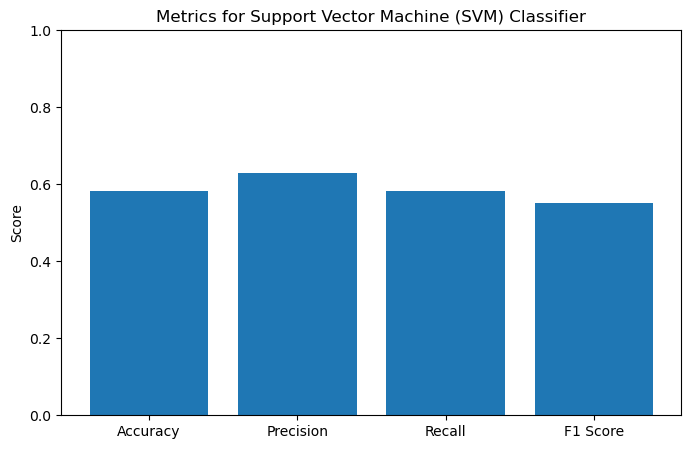

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined from previous steps

# Training SVM classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Making predictions on the test set
svm_preds = svm_clf.predict(X_test)

# Calculating various metrics
accuracy = accuracy_score(y_test, svm_preds)
precision = precision_score(y_test, svm_preds, average='weighted')
recall = recall_score(y_test, svm_preds, average='weighted')
f1 = f1_score(y_test, svm_preds, average='weighted')
conf_matrix = confusion_matrix(y_test, svm_preds)

# Printing metrics
print("SVM Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# Plotting metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title('Metrics for Support Vector Machine (SVM) Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


c:\Users\NadimintiDeepthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Metrics:
Accuracy: 0.7563451776649747
Precision: 0.7719355739994265
Recall: 0.7563451776649747
F1 Score: 0.7363390881505856


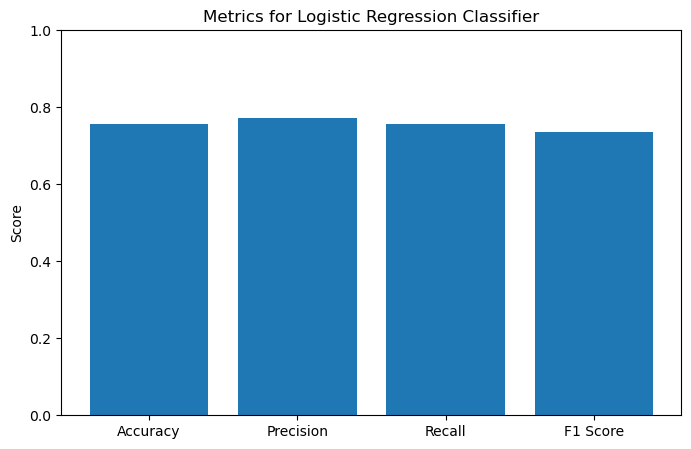

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X', 'y' are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Logistic Regression classifier with regularization
lr_clf = LogisticRegression(max_iter=10000, C=0.06)  # Reduced C for stronger regularization
lr_clf.fit(X_train_scaled, y_train)

# Making predictions on the test set
lr_preds = lr_clf.predict(X_test_scaled)

# Calculating various metrics
accuracy = accuracy_score(y_test, lr_preds)
precision = precision_score(y_test, lr_preds, average='weighted')
recall = recall_score(y_test, lr_preds, average='weighted')
f1 = f1_score(y_test, lr_preds, average='weighted')
conf_matrix = confusion_matrix(y_test, lr_preds)

# Printing metrics
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plotting metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title('Metrics for Logistic Regression Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


KNN Metrics:
Accuracy: 0.6954314720812182
Precision: 0.7411697017026967
Recall: 0.6954314720812182
F1 Score: 0.6947809466841756


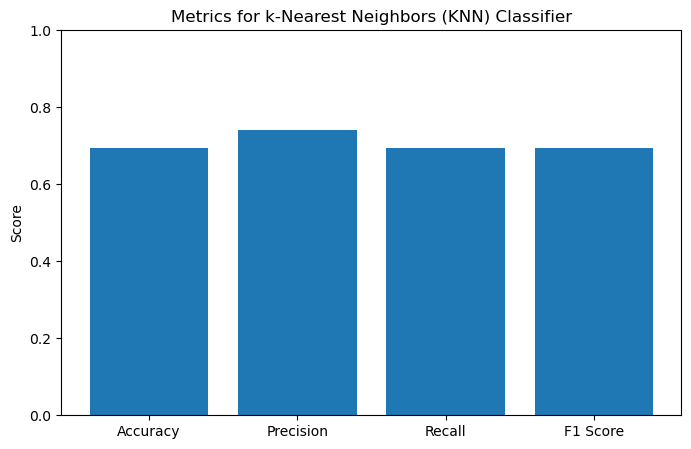

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined from previous steps

# Training KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Making predictions on the test set
knn_preds = knn_clf.predict(X_test)

# Calculating various metrics
accuracy = accuracy_score(y_test, knn_preds)
precision = precision_score(y_test, knn_preds, average='weighted')
recall = recall_score(y_test, knn_preds, average='weighted')
f1 = f1_score(y_test, knn_preds, average='weighted')
conf_matrix = confusion_matrix(y_test, knn_preds)

# Printing metrics
print("KNN Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plotting metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title('Metrics for k-Nearest Neighbors (KNN) Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


Decision Tree Metrics:
Accuracy: 0.583756345177665
Precision: 0.4863299513045706
Recall: 0.583756345177665
F1 Score: 0.5092480574714078


c:\Users\NadimintiDeepthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


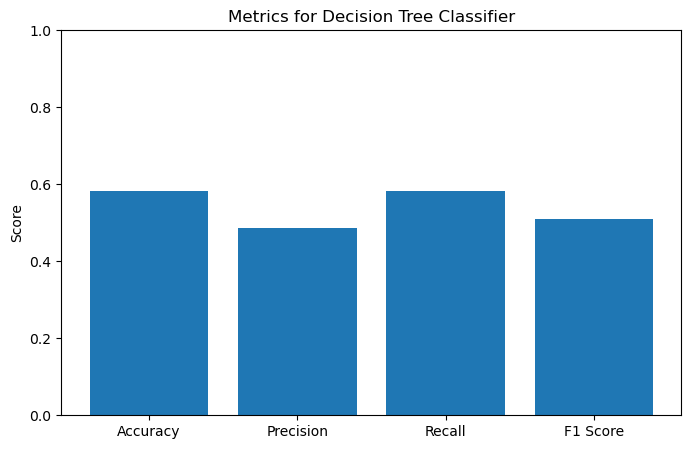

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined from previous steps

# Training Decision Tree classifier with limited max_depth
dt_clf = DecisionTreeClassifier(max_depth=7)  # Limiting the max depth to 5
dt_clf.fit(X_train, y_train)

# Making predictions on the test set
dt_preds = dt_clf.predict(X_test)

# Calculating various metrics
accuracy = accuracy_score(y_test, dt_preds)
precision = precision_score(y_test, dt_preds, average='weighted')
recall = recall_score(y_test, dt_preds, average='weighted')
f1 = f1_score(y_test, dt_preds, average='weighted')
conf_matrix = confusion_matrix(y_test, dt_preds)

# Printing metrics
print("Decision Tree Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# Plotting metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title('Metrics for Decision Tree Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


In [42]:
X_test1 = np.array([3,2,0.398462,15,5,1,2,3])
X_test1_reshaped = X_test1.reshape(1, -1)


# Predict using the model
y_pred1 = lr_clf.predict(X_test1_reshaped)


# Print the predictions
print("Predictions for X_test1:", y_pred1)


Predictions for X_test1: ['IoT Solutions Workshop']
